In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt 
import plotly.express as px 


In [3]:
df = pd.read_csv('./mushroom_cleaned.csv') 
df 

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0            1545          11  1.804273      1  
1            1557          11  1.804273      1  
2            1566          11  1.804273      1  
3            1566          11  1.804273      1  
4            1464          11  0.943195      1  
...           ...         ...       ...    ...  
54030         569          12  0.943195      1  
54031         490          12  0.943195      1  
54032         584          12  0.888450      1  
54033         491          12  0.888450      1  
54034         492          12  0.888450      1  

[54035 rows x 9 columns]

In [4]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
df.describe()
# 통계 정보 요약 


cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000      0.027372      0.000000  
25%        0.270997    421.000000      6.000000      0.888450      0.000000  
50%        0.593295    923.000000     11.000000      0.943195      1.000000  
75%        1.054858   1523.000000     11.000000      0.943195      1.000000  
max        3.835320   3569.000000     12.000000      1.804273      1.000000

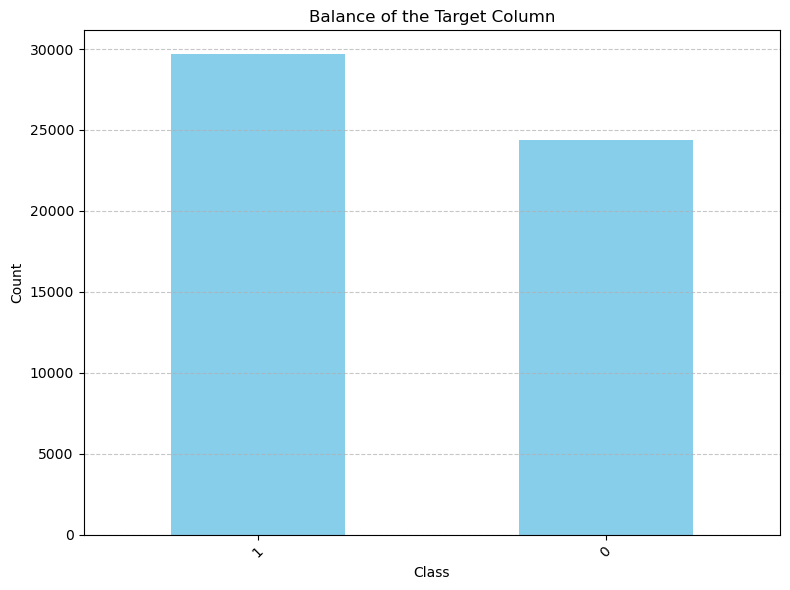

In [7]:
target_column = 'class'

target_balance = df[target_column].value_counts()

plt.figure(figsize=(8, 6)) 
target_balance.plot(kind='bar', color='skyblue')
plt.title('Balance of the Target Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

In [8]:
df.isnull()
# nullx 

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0             False      False            False       False        False   
1             False      False            False       False        False   
2             False      False            False       False        False   
3             False      False            False       False        False   
4             False      False            False       False        False   
...             ...        ...              ...         ...          ...   
54030         False      False            False       False        False   
54031         False      False            False       False        False   
54032         False      False            False       False        False   
54033         False      False            False       False        False   
54034         False      False            False       False        False   

       stem-width  stem-color  season  class  
0           False       False   False  False  
1           False       False   False  False  
2           False       False   False  False  
3           False       False   False  False  
4           False       False   False  False  
...           ...         ...     ...    ...  
54030       False       False   False  False  
54031       False       False   False  False  
54032       False       False   False  False  
54033       False       False   False  False  
54034       False       False   False  False  

[54035 rows x 9 columns]

In [10]:
corr_matrix = df.corr() 
corr_matrix["class"].sort_values(ascending=False) 


class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64

In [11]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
           'stem-height', 'stem-width', 'stem-color', 'season']
figs = []

for column in columns:
    fig = px.box(df, x=column, title=f'Box Plot of {column}')
    figs.append(fig)

for fig in figs:
    fig.show()
# 데이터 이상값 box 시각화 
# class data drop 


In [12]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler() 

X = df.drop('class', axis='columns')
Y = df['class'] 


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)
x_train = std.fit_transform(x_train)
x_test =  std.transform(x_test) 

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train) 
# data 분할 


RandomForestClassifier()

In [13]:
mode1 = RandomForestClassifier(n_estimators=100)
mode1.fit(x_train, y_train)


RandomForestClassifier()

In [14]:
# 모델 평가
mode1.score(x_train, y_train)


1.0

In [15]:
mode1.score(x_test, y_test)

0.9893587489590081

In [16]:
mode1.feature_importances_


array([0.12433916, 0.09441639, 0.14918433, 0.12522352, 0.12101546,
       0.22327942, 0.12552899, 0.03701272])

In [17]:
y_predicted = mode1.predict(x_test)


In [18]:
cm = confusion_matrix(y_test, y_predicted) 
cm 


array([[4763,   51],
       [  64, 5929]], dtype=int64)

Text(92.25, 0.5, 'Truth')

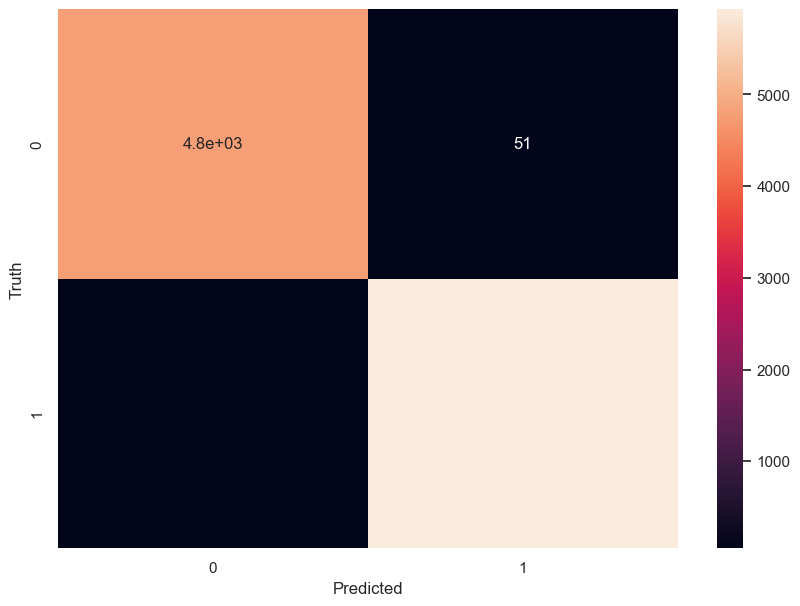

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [20]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
print(result_df) 

       Actual  Predicted
627         1          1
6956        1          1
337         1          1
16521       0          0
27576       1          1
...       ...        ...
30492       0          0
49087       0          0
2314        0          0
42356       1          1
35365       1          1

[10807 rows x 2 columns]
